In [275]:
import numpy as np
import pandas as pd
import talib 
import tensorflow
import keras

In [276]:
import random
random.seed(1234)

In [277]:
dataset = pd.read_csv('C:\\BÜSRA\\Uni\\Master\\Pflichtfächer\\Projekt Simulation SS 18\\DATEN IBM\\ohlc_jan18_feb18.csv')
dataset = dataset.dropna()
dataset = dataset[['<OPEN>','<HIGH>','<LOW>','<CLOSE>']]
dataset = dataset[20:30] # ab 01.02.2018 bis 12.02.2018 -- Zeilen 21:31 -- Training: [20:27] , Test: [27:30]
dataset

,<OPEN>,<HIGH>,<LOW>,<CLOSE>
20,163.74,164.98,162.80,163.74
21,163.20,164.13,161.94,162.43
22,161.34,161.79,158.87,158.94
23,158.10,158.37,150.00,152.55
24,150.52,155.48,149.25,155.31
25,154.16,155.28,153.43,153.95
26,152.32,153.16,147.50,147.54
27,148.84,150.54,144.41,149.51
28,150.81,152.39,150.30,151.41
29,150.90,151.15,149.65,150.79


In [278]:
dataset['H-L'] = dataset['<HIGH>'] - dataset['<LOW>']
dataset['O-C'] = dataset['<CLOSE>'] - dataset['<OPEN>']
dataset['Log Renditen'] = np.log(dataset['<CLOSE>']/dataset['<CLOSE>'].shift(1))
dataset['Log Renditen(t+1)']=dataset['Log Renditen'].shift(-1)

In [279]:
dataset = dataset.dropna()
dataset = dataset.dropna(thresh=2)
dataset

,<OPEN>,<HIGH>,<LOW>,<CLOSE>,H-L,O-C,Log Renditen,Log Renditen(t+1)
21,163.20,164.13,161.94,162.43,2.19,-0.77,-0.008033,-0.021720
22,161.34,161.79,158.87,158.94,2.92,-2.40,-0.021720,-0.041034
23,158.10,158.37,150.00,152.55,8.37,-5.55,-0.041034,0.017931
24,150.52,155.48,149.25,155.31,6.23,4.79,0.017931,-0.008795
25,154.16,155.28,153.43,153.95,1.85,-0.21,-0.008795,-0.042529
26,152.32,153.16,147.50,147.54,5.66,-4.78,-0.042529,0.013264
27,148.84,150.54,144.41,149.51,6.13,0.67,0.013264,0.012628
28,150.81,152.39,150.30,151.41,2.09,0.60,0.012628,-0.004103


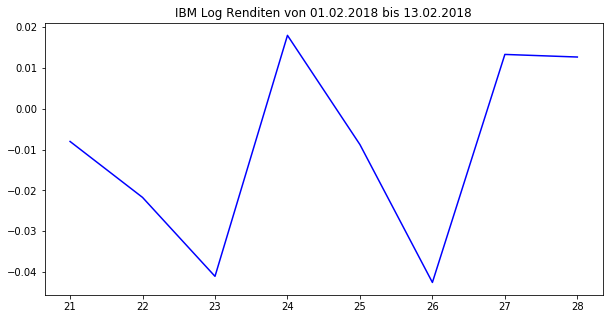

In [280]:
from matplotlib import pyplot
%matplotlib inline
datz = dataset['Log Renditen']
#datz.head()
pyplot.figure(figsize=(10,5))
pyplot.plot(datz, color='b')
pyplot.title('IBM Log Renditen von 01.02.2018 bis 13.02.2018')
pyplot.show()

In [281]:
X = dataset[['<CLOSE>', 'H-L','O-C']]
y = dataset[['Log Renditen(t+1)']]

In [282]:
X

,<CLOSE>,H-L,O-C
21,162.43,2.19,-0.77
22,158.94,2.92,-2.40
23,152.55,8.37,-5.55
24,155.31,6.23,4.79
25,153.95,1.85,-0.21
26,147.54,5.66,-4.78
27,149.51,6.13,0.67
28,151.41,2.09,0.60


In [283]:
y

,Log Renditen(t+1)
21,-0.021720
22,-0.041034
23,0.017931
24,-0.008795
25,-0.042529
26,0.013264
27,0.012628
28,-0.004103


In [284]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [285]:
X

array([[1.        , 0.05214724, 0.4622824 ],
       [0.76561451, 0.16411043, 0.30464217],
       [0.33646743, 1.        , 0.        ],
       [0.52182673, 0.67177914, 1.        ],
       [0.43049026, 0.        , 0.51644101],
       [0.        , 0.58435583, 0.07446809],
       [0.13230356, 0.65644172, 0.60154739],
       [0.25990598, 0.03680982, 0.59477756]])

In [286]:
# ab 01.02.18 als training  --- 6 Tage
# 12.02 und 13.02 vorhersagen --- da t+1
X_train = X[:6]
X_test = X[6:]
y_train = y[:6]
y_test = y[6:]

In [287]:
X_test

array([[0.13230356, 0.65644172, 0.60154739],
       [0.25990598, 0.03680982, 0.59477756]])

In [288]:
print(len(X_train), len(X_test))
print(len(y_train),len(y_test))

6 2
6 2


In [289]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [290]:
knn = Sequential()
knn.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu', input_dim = X.shape[1]))
knn.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
knn.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))

In [291]:
knn.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [292]:
hist = knn.fit(X_train, y_train, batch_size = 10, epochs = 50, validation_data=(X_test, y_test), verbose=2, shuffle=False)

Train on 6 samples, validate on 2 samples
Epoch 1/50
 - 0s - loss: 0.3802 - val_loss: 0.6161
Epoch 2/50
 - 0s - loss: 0.3791 - val_loss: 0.6146
Epoch 3/50
 - 0s - loss: 0.3782 - val_loss: 0.6128
Epoch 4/50
 - 0s - loss: 0.3771 - val_loss: 0.6109
Epoch 5/50
 - 0s - loss: 0.3759 - val_loss: 0.6091
Epoch 6/50
 - 0s - loss: 0.3748 - val_loss: 0.6072
Epoch 7/50
 - 0s - loss: 0.3736 - val_loss: 0.6053
Epoch 8/50
 - 0s - loss: 0.3725 - val_loss: 0.6033
Epoch 9/50
 - 0s - loss: 0.3713 - val_loss: 0.6014
Epoch 10/50
 - 0s - loss: 0.3701 - val_loss: 0.5994
Epoch 11/50
 - 0s - loss: 0.3689 - val_loss: 0.5973
Epoch 12/50
 - 0s - loss: 0.3676 - val_loss: 0.5953
Epoch 13/50
 - 0s - loss: 0.3664 - val_loss: 0.5932
Epoch 14/50
 - 0s - loss: 0.3651 - val_loss: 0.5910
Epoch 15/50
 - 0s - loss: 0.3638 - val_loss: 0.5888
Epoch 16/50
 - 0s - loss: 0.3624 - val_loss: 0.5866
Epoch 17/50
 - 0s - loss: 0.3611 - val_loss: 0.5843
Epoch 18/50
 - 0s - loss: 0.3597 - val_loss: 0.5820
Epoch 19/50
 - 0s - loss: 0.358

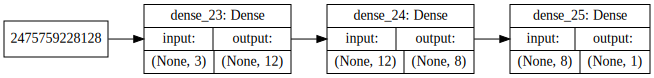

In [293]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(knn, show_shapes=True, rankdir='LR').create(prog='dot', format='svg'))

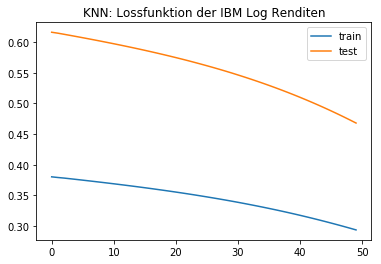

In [294]:
# plot history
pyplot.plot(hist.history['loss'], label='train')
pyplot.plot(hist.history['val_loss'], label='test')
pyplot.title('KNN: Lossfunktion der IBM Log Renditen')
pyplot.legend()
pyplot.show()

In [295]:
y_pred = knn.predict(X_test)
#y_pred
#y_test

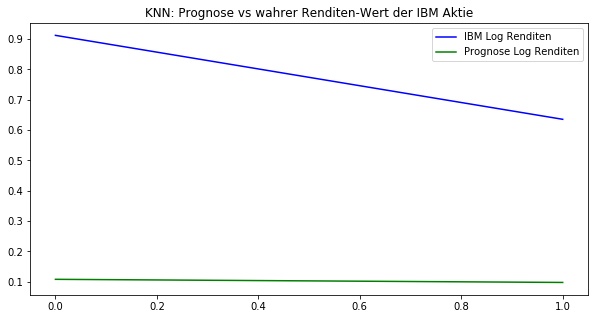

In [296]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(y_test, color='b', label='IBM Log Renditen')
plt.plot(y_pred , color='g', label='Prognose Log Renditen')
plt.title('KNN: Prognose vs wahrer Renditen-Wert der IBM Aktie')
plt.legend()
plt.show()

In [297]:
y_test

array([[0.91229466],
       [0.63555693]])

In [298]:
y_pred

array([[0.10808008],
       [0.0977824 ]], dtype=float32)

In [299]:
from math import sqrt
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print('Test MSE: %.4f' % mse)

rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Test RMSE: %.4f' % rmse)

Test MSE: 0.4680
Test RMSE: 0.6841


In [300]:
KP_knn_log_return=open("C:\\BÜSRA\\Uni\\Master\\Pflichtfächer\\Projekt Simulation SS 18\\Output\\Kurzzeit Output\\KP_KNN_Log_Returns.txt",'w')
print(y_test,file=KP_knn_log_return)
KP_knn_log_return.close()

In [301]:
KP_knn_output_log_return=open("C:\\BÜSRA\\Uni\\Master\\Pflichtfächer\\Projekt Simulation SS 18\\Output\\Kurzzeit Output\\KP_KNN_Log_Returns_output.txt",'w')
print(y_pred,file=KP_knn_output_log_return)
KP_knn_output_log_return.close()